In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder


In [260]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [261]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [262]:
df.drop('deck',axis=1,inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [263]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

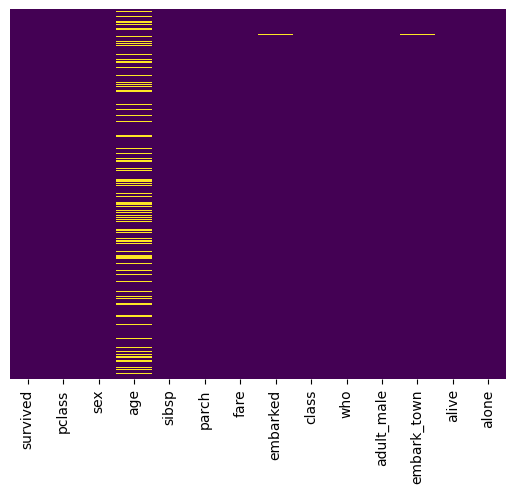

In [264]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [265]:
df['age']=df.age.fillna(value=df['age'].mean())
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [266]:
df['embarked']=df.embarked.fillna(value=df['embarked'].mode()[0])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [267]:
df['embark_town']=df.age.fillna(value=df['embark_town'].mode()[0])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,22.000000,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,38.000000,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,26.000000,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,35.000000,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,35.000000,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,27.000000,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,19.000000,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,29.699118,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,26.000000,yes,True


In [268]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [269]:
df.shape

(891, 14)

In [270]:
df.duplicated().sum()

111

In [271]:
df.drop_duplicates(inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,22.000000,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,38.000000,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,26.000000,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,35.000000,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,35.000000,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,39.000000,no,False
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,19.000000,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,29.699118,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,26.000000,yes,True


In [272]:
df.shape

(780, 14)

In [273]:
#  l=LabelEncoder()

In [274]:
# label_encoder = LabelEncoder()

# # Sex, Embarked, Class, Who, Adult_male, Deck, Embark_town, Alive, Alone columns ko encode karna
# categorical_columns = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone']
# for column in categorical_columns:
#     df[column] = label_encoder.fit_transform(df[column])

In [275]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,22.0,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,38.0,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,26.0,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,35.0,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,35.0,no,True


In [276]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town     float64
alive            object
alone              bool
dtype: object

In [277]:
x=df[['pclass','sex','age','sibsp','parch','fare']]
y=df['survived']

In [278]:
x_train,y_train,x_test,y_test,=train_test_split(x,y,test_size=0.2)

In [279]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

ValueError: could not convert string to float: 'female'